<a href="https://colab.research.google.com/github/mrinal1404/mnist-digit-classification/blob/main/MNIST_digit_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow    # shows image , function present in cv2 but googlecolab doesnt allow so instead we use this
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix


In [ ]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [ ]:
type(x_train)

numpy.ndarray

In [ ]:
print(x_test.shape,x_train.shape,y_test.shape,y_train.shape)

(10000, 28, 28) (60000, 28, 28) (10000,) (60000,)


In [ ]:
print(np.unique(y_train))
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


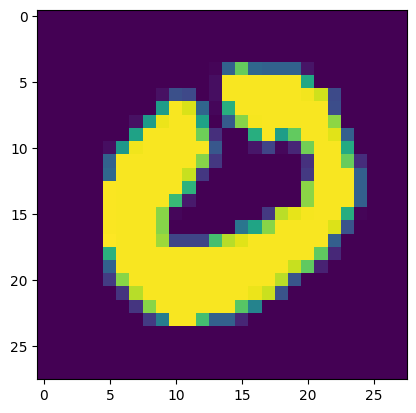

0


In [ ]:
plt.imshow(x_test[25])
plt.show()
print(y_test[25])

In [ ]:
###All the images have the same dimensions in this dataset, If not, we have to resize all the images to a common dimension

In [ ]:
x_train=x_train/255
x_test=x_test/255

In [ ]:
print(x_test[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [ ]:
#setting up layers
model=keras.Sequential([
                       keras.layers.Flatten(input_shape=(28,28)), #if rgb then include another parameter
                       keras.layers.Dense(50,activation='relu'),
                       keras.layers.Dense(50,activation='relu'),
                       keras.layers.Dense(10,activation='sigmoid')
])

In [ ]:
#compiling the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',   #we didnt use onehotencoding otherwise we had to use categorical_entropy
              metrics=['accuracy'])


In [ ]:
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3009 - accuracy: 0.9143
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1400 - accuracy: 0.9579
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1039 - accuracy: 0.9684
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0832 - accuracy: 0.9742
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0695 - accuracy: 0.9780
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0590 - accuracy: 0.9812
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0511 - accuracy: 0.9834
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0449 - accuracy: 0.9855
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0403 - accuracy: 0.9865
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.035

In [ ]:
#ACCURACY ON TEST DATA
loss,accuracy=model.evaluate(x_test,y_test)
print(accuracy)

313/313 [==============================] - 1s 1ms/step - loss: 0.1067 - accuracy: 0.9711
0.9710999727249146


unlike machine learning , ypred in deep learning works differently . here it tells the probability of label will be o or any value in the paranthesis.

In [ ]:
y_pred=model.predict(x_test)
print("the value is",y_pred[0])

313/313 [==============================] - 1s 2ms/step
the value is [4.7569636e-02 2.6936708e-02 4.5782519e-03 8.3522254e-01 4.5136785e-05
 1.0902174e-05 1.8147342e-05 9.9798977e-01 5.4912612e-02 1.6967538e-01]


In [ ]:
# converting the prediction probabilities to class label for all test data points
y_pred_labels = [np.argmax(i) for i in y_pred]
print(y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 9, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 4, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 0, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 8, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred_labels)
print(conf_mat)

tf.Tensor(
[[ 965    0    1    2    0    4    3    1    2    2]
 [   0 1119    2    2    0    2    2    0    8    0]
 [   1    0 1002    2    4    2    3    4   13    1]
 [   0    0    1  973    0   18    0    4    7    7]
 [   2    1    4    0  955    4    3    1    1   11]
 [   2    0    0    3    1  879    0    1    4    2]
 [   6    3    3    1    6   23  913    0    3    0]
 [   0    4   12    3    4    0    0  992    5    8]
 [   2    2    2    9    3   12    0    3  939    2]
 [   2    3    0    5   13    5    0    0    6  975]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

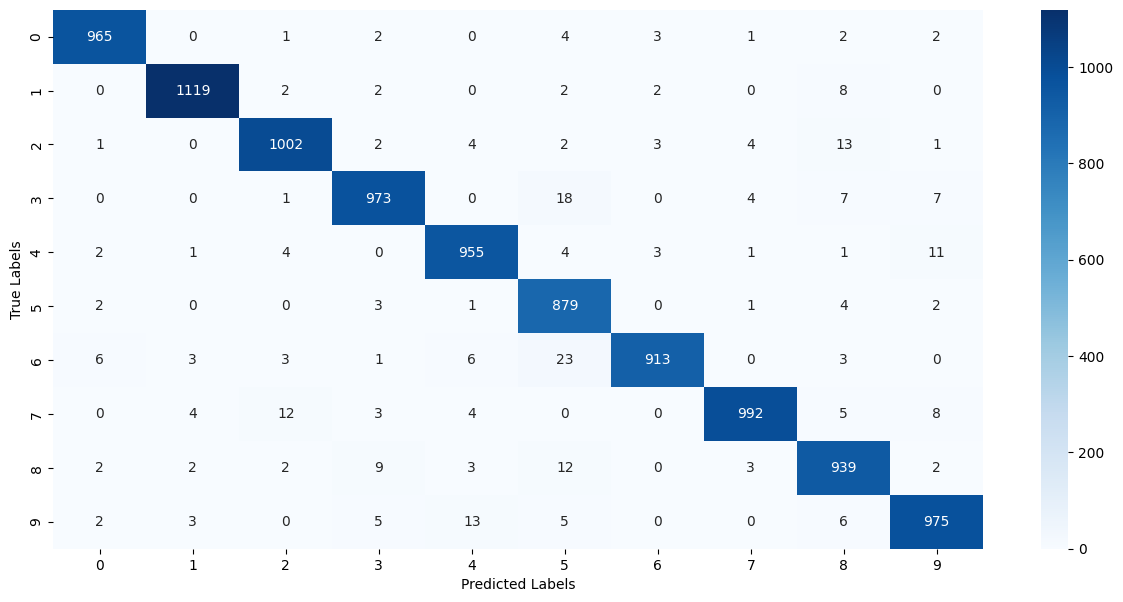

In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

**building a pred system**

In [ ]:
input_image_path='/content/MNIST_digit.png'
input_image=cv2.imread(input_image_path)
print(input_image)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


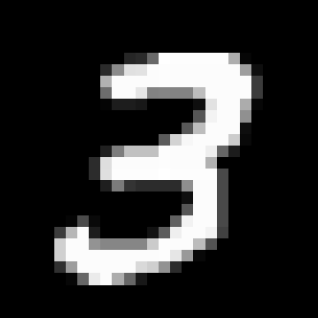

In [ ]:
cv2_imshow(input_image)

In [ ]:
input_image.shape

(318, 318, 3)

In [ ]:
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

In [ ]:
input_image_resize = cv2.resize(grayscale, (28, 28))

In [ ]:
cv2_imshow(input_image_resize)

In [ ]:
input_image_resize = input_image_resize/255

In [ ]:
image_reshaped = np.reshape(input_image_resize, [1,28,28])

In [ ]:
input_prediction = model.predict(image_reshaped)
print(input_prediction)

1/1 [==============================] - 0s 20ms/step
[[3.3210863e-06 2.5798818e-03 4.9000946e-03 1.0000000e+00 3.2945041e-10
  2.4276273e-02 3.9549236e-16 1.1252929e-03 5.7596004e-01 8.1894261e-01]]


In [ ]:
input_pred_label = np.argmax(input_prediction)

In [ ]:
print(input_pred_label)

3


**Prediction system**

Path of the image to be predicted: /content/MNIST_digit.png


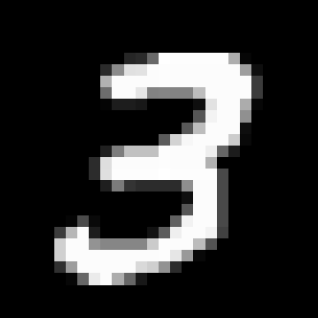

1/1 [==============================] - 0s 20ms/step
The Handwritten Digit is recognised as  3


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

input_image_resize = cv2.resize(grayscale, (28, 28))

input_image_resize = input_image_resize/255

image_reshaped = np.reshape(input_image_resize, [1,28,28])

input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)

print('The Handwritten Digit is recognised as ', input_pred_label)